In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
h = 4.135667E-15  
c = 299792458  
l = [587E-9,487E-9,427E-9,372E-9]
ratio = [1,0.52,0.14,0.04]
Lp = 1.2E16
sigma = 100*1000 #(nm)
r_eye = 150E-6
r_lens = 50E-6
OSD = [2.4E-6,2.4E-6,2.8E-6,2.6E-6]

### Natural Photon radiance for Red

In [37]:
print(np.format_float_scientific(Lp,precision=2) +' photon/m2/sr/s/nm')

1.2e+16 photon/m2/sr/s/nm


### Photon flux going through the retina (chromatic ratio applied)

In [38]:
pa = Lp*np.pi*np.square(r_lens)
Pa=[]
for i in range(4):
    p = ratio[i]*pa
    Pa.append(p)
    print(np.format_float_scientific(Pa[i],precision=2) +' photon/sr/s/nm')

9.42e+07 photon/sr/s/nm
4.90e+07 photon/sr/s/nm
1.32e+07 photon/sr/s/nm
3.77e+06 photon/sr/s/nm


### Cone outer-segment area

In [39]:
OSA = []
for i in range (4):
    osa = np.pi*np.square(OSD[i]/2)
    OSA.append(osa)
    print(np.format_float_scientific(OSA[i],precision=2) + ' m2')

4.52e-12 m2
4.52e-12 m2
6.16e-12 m2
5.31e-12 m2


### Collection angle

In [40]:
Omega = []
for i in range (4):
    omega = OSA[i] / np.square(r_eye)
    Omega.append(omega)
    print(np.format_float_scientific(Omega[i],precision=2) + ' sr')

2.01e-04 sr
2.01e-04 sr
2.74e-04 sr
2.36e-04 sr


### Photon flux

In [41]:
Phi = []
for i in range (4):
    phi = Pa[i]*omega*sigma 
    Phi.append(phi)
    print(np.format_float_scientific(Phi[i],precision=2)+ ' photon/s')

2.22e+09 photon/s
1.16e+09 photon/s
3.11e+08 photon/s
8.9e+07 photon/s


### Wavelength-dependent, photon energy

In [42]:
Q = []
for i in range(4):
    q = c*h/l[i]
    Q.append(q)
    print(np.format_float_scientific(Q[i],precision=2) +' eV/photon')

2.11e+00 eV/photon
2.55e+00 eV/photon
2.90e+00 eV/photon
3.33e+00 eV/photon


### Energy Flux

In [43]:
Pe = []
correction = 1
for i in range(4):
    pe = Phi[i]*Q[i]*correction
    Pe.append(pe)
    print(np.format_float_scientific(Pe[i],precision=2) +' eV/S')

4.7e+09 eV/S
2.94e+09 eV/S
9.04e+08 eV/S
2.96e+08 eV/S


In [44]:
eV_per_J = 6.242E+18    
PeF = []
for i in range (4):
    peF = Pe[i] / eV_per_J *10E9
    PeF.append(peF)
    print(np.format_float_scientific(PeF[i],precision=2) + ' nW')

7.53e+00 nW
4.72e+00 nW
1.45e+00 nW
4.75e-01 nW


<BarContainer object of 1 artists>

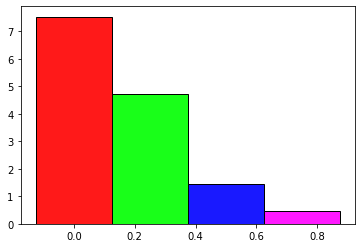

In [45]:
alpha = 0.9
In = 1
RGBA = [(In,0,0,alpha),(0,In,0,alpha),(0,0,In,alpha),(In,0,In,alpha)]

x = np.arange(1)
plt.bar(x, PeF[0],color =RGBA[0],edgecolor = 'k', width = 0.25)
plt.bar(x+0.25, PeF[1],color =RGBA[1],edgecolor = 'k',width = 0.25)
plt.bar(x+0.50, PeF[2],color =RGBA[2],edgecolor = 'k',width = 0.25)
plt.bar(x+0.75, PeF[3],color =RGBA[3],edgecolor = 'k',width = 0.25)

In [46]:
PeF

[7.525399954950407, 4.716741441989861, 1.448331073297013, 0.474990298231816]